# **Exploración y descripción de los datos**

## **Variables y su descripción**

Las variables clave en el estudio y el dataset están relacionadas con los seis tipos de usuario del Hexad-12. Cada usuario se evalúa a partir de dos ítems del cuestionario y las variables siguientes reflejan puntajes o medidas relacionadas con estos tipos:

Variables por ítem del cuestionario: Representan respuestas individuales a las preguntas del Hexad-12 para cada tipo de usuario, identificadas en el CSV con códigos como P1, S4, F1, A2, R2, D3, etc.

***Variables agregadas de tipos de usuario:***
* philanthropist: Puntaje agregado para el tipo Filántropo.
* socializer: Puntaje para el tipo Socializador.
* freeSpirit: Puntaje para Espíritu Libre.
* achiever: Puntaje para Alcanzador.
* player: Puntaje para Jugador.
* disruptor: Puntaje para Disruptor.
* Variables demográficas relacionadas: age (edad), gender (género), countryOfOrigin (país de origen).
* Variables de porcentajes: muestran la proporción relativa de cada tipo en el perfil del usuario.

***Cada tipo de usuario Hexad tiene características motivacionales específicas:***

* Philanthropist: Motivados por propósito y altruismo, les gusta ayudar a otros.
* Socializer: Orientados a la interacción y conexión social.
* Free Spirit: Valoran la autonomía y libertad para crear y explorar.
* Achiever: Buscan competencia y superación de desafíos.
* Player: Motivados extrínsecamente por recompensas.
* Disruptor: Buscan probar límites y cuestionar reglas.

Estas variables representan la evaluación del perfil del usuario según estas motivaciones y preferencias.

In [ ]:
!pip install pandasql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandasql as ps
warnings.filterwarnings('ignore')

In [ ]:
df_comp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks Data/dataset-hexad-12-study-2.csv') # Convirtiendo la data a un objeto DataFrame
df = df_comp.copy() # Creando una copia del DataFrame original

In [ ]:
df.head()

,token,referral,creationDate,lastUpdate,status,P1,S4,F2,A1,R3,...,hexadType_freeSpirit,hexadType_achiever,hexadType_player,hexadType_disruptor,hexadType_percentage_philanthropist,hexadType_percentage_socializer,hexadType_percentage_freeSpirit,hexadType_percentage_achiever,hexadType_percentage_player,hexadType_percentage_disruptor
0,c5f3064a-f994-4cc7-9af5-68511587516d,facebook,2022-01-06T23:34:26.917Z,2022-01-06T23:36:24.772Z,final,4,1,6,5,1,...,24,17,13,16,57.14,17.86,85.71,60.71,46.43,57.14
1,e094d917-3d5c-4eb5-bcea-a4bbb6f10a7a,facebook,2022-01-07T00:56:40.605Z,2022-01-07T00:57:47.198Z,final,6,4,7,5,7,...,26,22,26,15,78.57,64.29,92.86,78.57,92.86,53.57
2,b899bf70-3871-4e40-a0e6-77cab3c01b27,facebook,2022-01-07T01:22:01.334Z,2022-01-07T01:22:57.540Z,final,7,7,7,6,4,...,25,26,25,13,100.00,96.43,89.29,92.86,89.29,46.43
3,38622d52-9091-4a6b-90a6-fad357775eef,facebook,2022-01-07T01:48:22.519Z,2022-01-07T01:52:44.378Z,final,6,5,6,5,6,...,22,25,23,14,71.43,71.43,78.57,89.29,82.14,50.00
4,ded02e23-7be3-4b77-8c44-28271d878015,facebook,2022-01-07T01:53:22.472Z,2022-01-07T01:56:30.768Z,final,7,5,5,7,6,...,26,22,27,19,82.14,39.29,92.86,78.57,96.43,67.86


In [ ]:
df.tail()

,token,referral,creationDate,lastUpdate,status,P1,S4,F2,A1,R3,...,hexadType_freeSpirit,hexadType_achiever,hexadType_player,hexadType_disruptor,hexadType_percentage_philanthropist,hexadType_percentage_socializer,hexadType_percentage_freeSpirit,hexadType_percentage_achiever,hexadType_percentage_player,hexadType_percentage_disruptor
1096,b3fde991-99e0-4665-9785-670ac7dfdaf5,prolific,2022-01-17T07:38:26.527Z,2022-01-17T07:39:47.793Z,final,5,3,7,7,5,...,27,28,24,21,75.00,67.86,96.43,100.00,85.71,75.00
1097,d719e8e6-1011-472f-8122-e09668088977,prolific,2022-01-17T07:38:33.370Z,2022-01-17T07:40:54.740Z,final,5,3,6,6,5,...,23,24,23,22,71.43,50.00,82.14,85.71,82.14,78.57
1098,511b4e35-ee68-4775-86a3-0f37bc77a8e2,prolific,2022-01-17T07:38:38.680Z,2022-01-17T07:39:55.914Z,final,5,2,7,6,7,...,27,26,27,17,57.14,25.00,96.43,92.86,96.43,60.71
1099,b9b6225f-ff46-4c3d-9662-72f87f703785,prolific,2022-01-17T07:39:26.494Z,2022-01-17T07:40:33.118Z,final,6,5,5,6,6,...,24,25,26,19,89.29,78.57,85.71,89.29,92.86,67.86
1100,fa821890-d264-4893-84ea-e6c762a51cb8,prolific,2022-01-17T07:45:45.407Z,2022-01-17T07:46:40.819Z,final,6,6,6,5,5,...,20,21,22,21,82.14,78.57,71.43,75.00,78.57,75.00


# **Análisis Univariado**

In [ ]:
# Analisis estadistico de las variables
df.describe()

,P1,S4,F2,A1,R3,P3,S1,D1,F1,A4,...,hexadType_freeSpirit,hexadType_achiever,hexadType_player,hexadType_disruptor,hexadType_percentage_philanthropist,hexadType_percentage_socializer,hexadType_percentage_freeSpirit,hexadType_percentage_achiever,hexadType_percentage_player,hexadType_percentage_disruptor
count,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,...,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000
mean,6.108084,4.570391,5.673025,5.752952,5.427793,5.941871,4.865577,3.244323,5.566757,5.980926,...,22.215259,23.190736,22.597639,15.309718,83.265232,68.742752,79.340300,82.824160,80.705840,54.677729
std,0.968663,1.615210,1.158482,1.115512,1.370968,1.034091,1.532706,1.693645,1.208434,1.085692,...,3.394646,3.449630,3.735670,4.655142,12.443888,17.904160,12.123985,12.320449,13.341878,16.625537
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,4.000000,4.000000,4.000000,14.290000,14.290000,14.290000,14.290000,14.290000,14.290000
25%,6.000000,3.000000,5.000000,5.000000,5.000000,5.000000,4.000000,2.000000,5.000000,5.000000,...,20.000000,21.000000,21.000000,12.000000,75.000000,57.140000,71.430000,75.000000,75.000000,42.860000
50%,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000,5.000000,3.000000,6.000000,6.000000,...,22.000000,24.000000,23.000000,15.000000,85.710000,71.430000,78.570000,85.710000,82.140000,53.570000
75%,7.000000,6.000000,6.000000,7.000000,7.000000,7.000000,6.000000,5.000000,6.000000,7.000000,...,25.000000,26.000000,25.000000,19.000000,92.860000,82.140000,89.290000,92.860000,89.290000,67.860000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,28.000000,28.000000,28.000000,28.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


## **Análisis de la media**

Según el análisis de estadística descriptiva realizado, podemos identificar cuál de los seis tipos de comportamiento es más o menos habitual considerando la media de cada variable. El orden, de mayor a menor frecuencia promedio, queda de la siguiente manera:

1. Philanthropist
2. Achiever
3. Player
4. Free Spirit
5. Socializer
6. Disruptor

Este orden permite observar cuáles tipos de comportamiento son predominantes en la muestra y cuáles se presentan con menor frecuencia, facilitando así la interpretación de los resultados.

---

### **Ideas o Insights**

* El tipo Philanthropist es el más frecuente o con mayor presencia, lo que indica una tendecia hacia usuarios motivados por ayudar a otros. Esto sugiere que el diseño de elementos gamificados que incluyan elementos sociales y de cooperación puede ser de buena motivación para los usuarios¨.
* El segundo lugar de Achiever refleja la alta presencia de usuarios orientados al logro de competencia, interesados en desafíos y superación personal. Sería una buena idea incluir esta motivación porque puede guiar a la inclusión de metas, retos y feedback para la mejoría.
* El lugar intermedio Player, interesado en recompensas, implica que los incentivos y premios siguen siendo relevantes para muchos usuarios.
* Free Spirit y Socializer se posicionan en niveles medios-bajos, indicando que la autonomía/exploración y la interacción social tienen una presencia moderada.
* El tipo Disruptor, que representa a usuarios con motivación rebelde y de probar límites, es el menos frecuente, reflejando que este perfil no es común en la muestra y puede ser menos prioritario.

Los resultados puedes ayudar a orientarnos acerca del diseño a estos perfiles para obtener los mejores resultados posibles.

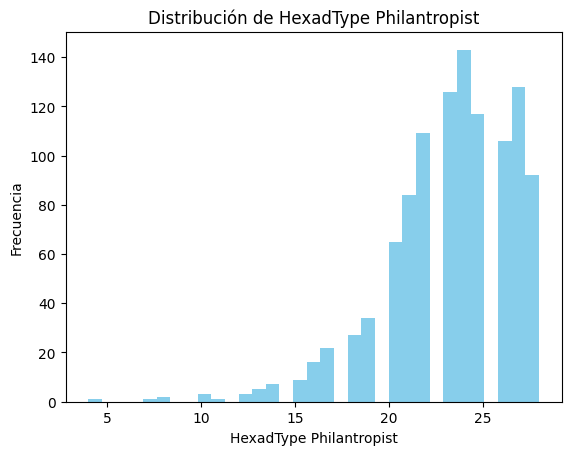

In [ ]:
# Histograma de la distribucion de la variable Philantrophist
plt.hist(df['hexadType_philanthropist'], bins=33, color='skyblue')
plt.title('Distribución de HexadType Philantropist')
plt.xlabel('HexadType Philantropist')
plt.ylabel('Frecuencia')
plt.show()

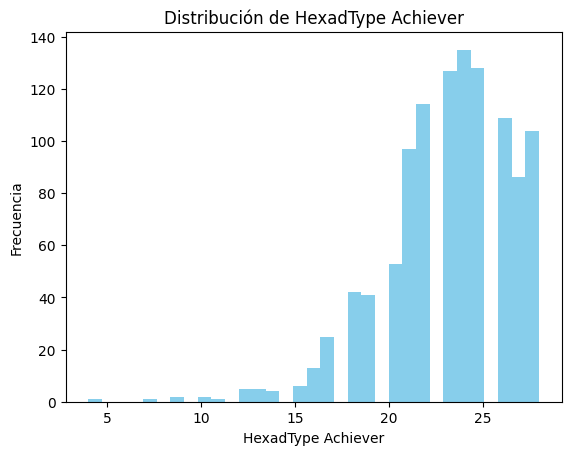

In [ ]:
# Histograma de la distribucion de la variable Achiever
plt.hist(df['hexadType_achiever'], bins=33, color='skyblue')
plt.title('Distribución de HexadType Achiever')
plt.xlabel('HexadType Achiever')
plt.ylabel('Frecuencia')
plt.show()

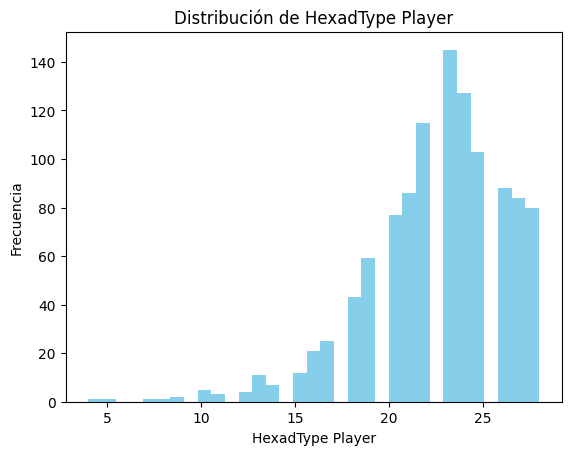

In [ ]:
# Histograma de la distribucion de la variable Player
plt.hist(df['hexadType_player'], bins=33, color='skyblue')
plt.title('Distribución de HexadType Player')
plt.xlabel('HexadType Player')
plt.ylabel('Frecuencia')
plt.show()

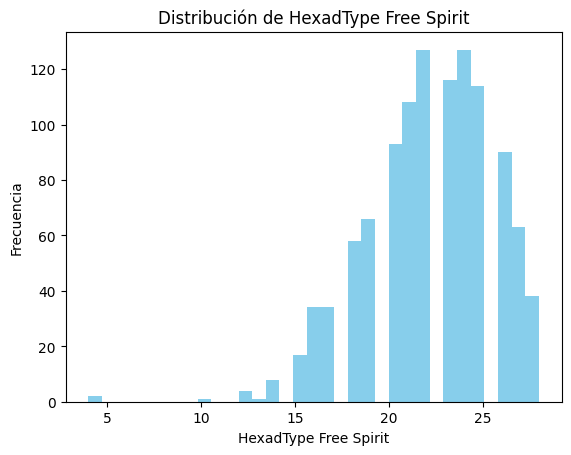

In [ ]:
# Histograma de la distribucion de la variable Free Spirit
plt.hist(df['hexadType_freeSpirit'], bins=33, color='skyblue')
plt.title('Distribución de HexadType Free Spirit')
plt.xlabel('HexadType Free Spirit')
plt.ylabel('Frecuencia')
plt.show()

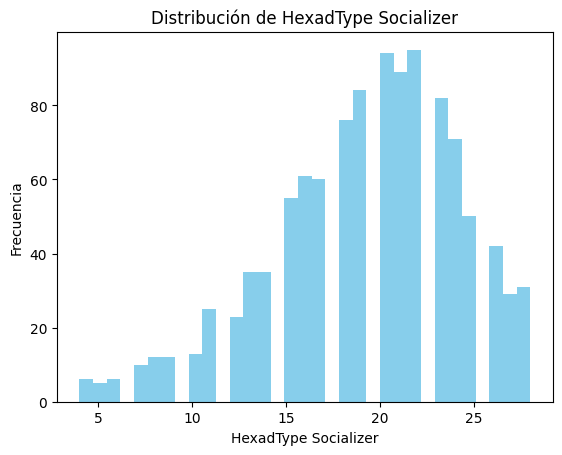

In [ ]:
# Histograma de la distribucion de la variable Socializer
plt.hist(df['hexadType_socializer'], bins=33, color='skyblue')
plt.title('Distribución de HexadType Socializer')
plt.xlabel('HexadType Socializer')
plt.ylabel('Frecuencia')
plt.show()

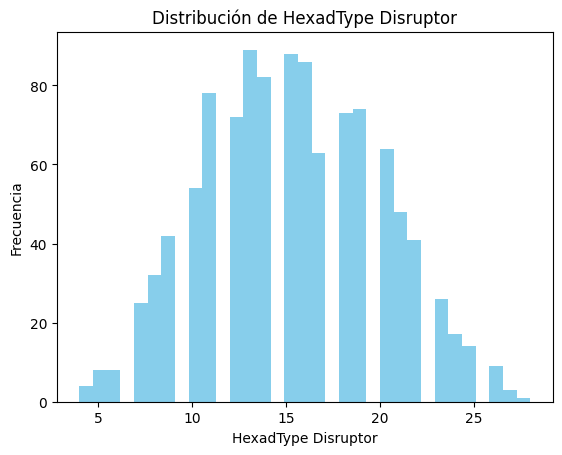

In [ ]:
# Histograma de la distribucion de la variable Disruptor
plt.hist(df['hexadType_disruptor'], bins=33, color='skyblue')
plt.title('Distribución de HexadType Disruptor')
plt.xlabel('HexadType Disruptor')
plt.ylabel('Frecuencia')
plt.show()

## **Análisis de las Variables Demográficas**

In [ ]:
# Analisis de la edad
df['age'].describe() # Descripcion estadistica de la edad



,age
count,1009.000000
mean,31.667988
std,12.579816
min,12.000000
25%,22.000000
50%,28.000000
75%,38.000000
max,84.000000


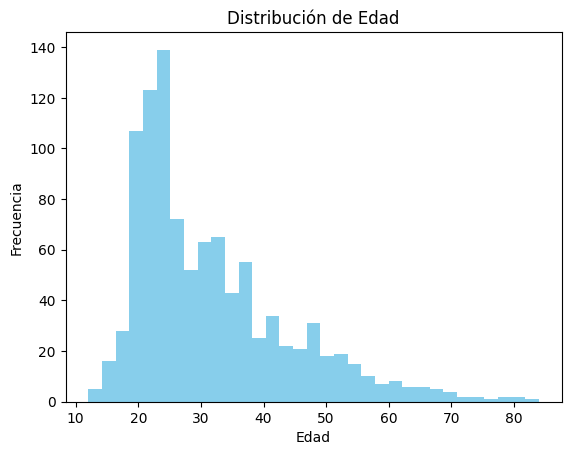

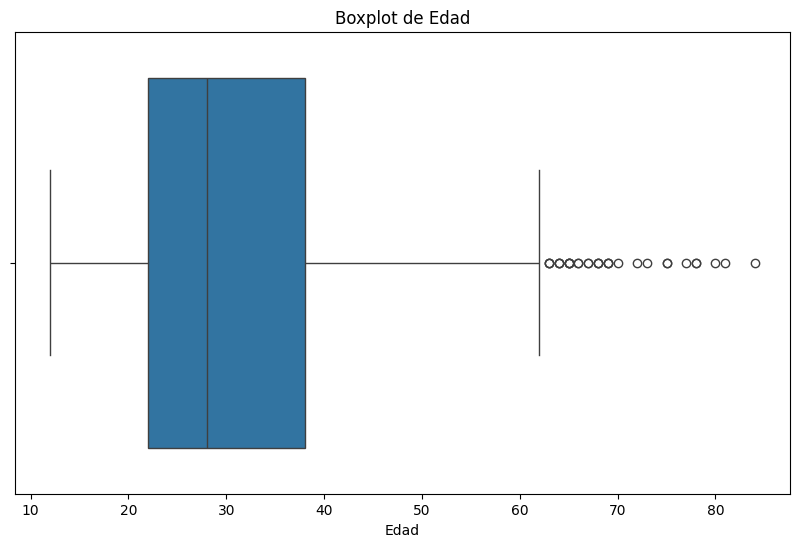

In [ ]:
# Visualizacion de los datos de edad
plt.hist(df['age'], bins=33, color='skyblue')
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='age', data=df)
plt.title('Boxplot de Edad')
plt.xlabel('Edad')
plt.show()

In [ ]:
df['gender'].value_counts(normalize=True) * 100 # Proporcion del genero de los datos

,proportion
gender,
male,51.781737
female,43.986637
other,4.231626


In [ ]:
df['countryOfOrigin_label'].value_counts(normalize=True) * 100 # Proporcion de los paises de origen

,proportion
countryOfOrigin_label,
United Kingdom of Great Britain and Northern Ireland,45.190381
Australia,15.931864
Canada,14.929860
United States of America,13.426854
New Zealand,5.611222
Ireland,2.304609
Israel,0.300601
Lithuania,0.200401
Malaysia,0.200401


La muestra se compone principalmente de adultos jóvenes de 31 años en promedio, con equilibrio de género, pero presenta una sobrerrepresentación geográfica del Reino Unido.
Esto se debe tener en cuenta al interpretar los resultados, ya que el análisis puede no ser completamente generalizable a otros contextos internacionales.

# **Análisis Bivariado**

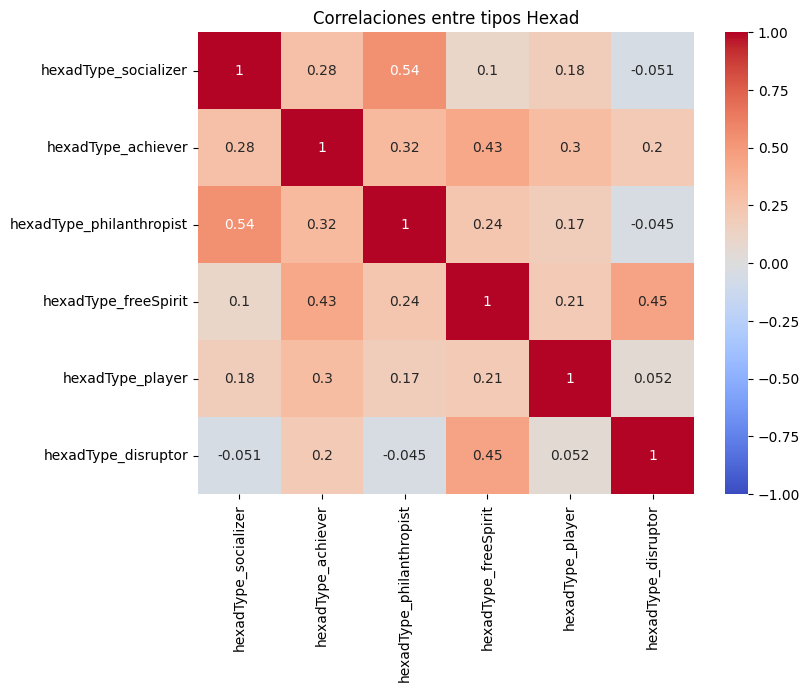

In [ ]:
# Calcular correlaciones (Pearson por defecto, puedes usar method="spearman")
corr = df[['hexadType_socializer', 'hexadType_achiever', 'hexadType_philanthropist', 'hexadType_freeSpirit', 'hexadType_player', 'hexadType_disruptor']].corr(method="pearson")

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlaciones entre tipos Hexad")
plt.show()

## Correlaciones Hexad

- **Philanthropist ↔ Socializer:** r = 0.54 → correlación moderada a fuerte, relevante.  
- **Disruptor ↔ Freespirit:** r = 0.45 → correlación moderada, relevante.  

> En términos de Hexad, esto podría indicar que ciertas motivaciones o tipos de jugadores tienden a coexistir: alguien que es altruista/socializador también tiende a tener características de socializer, y disruptores tienden a coincidir algo con freespirit.

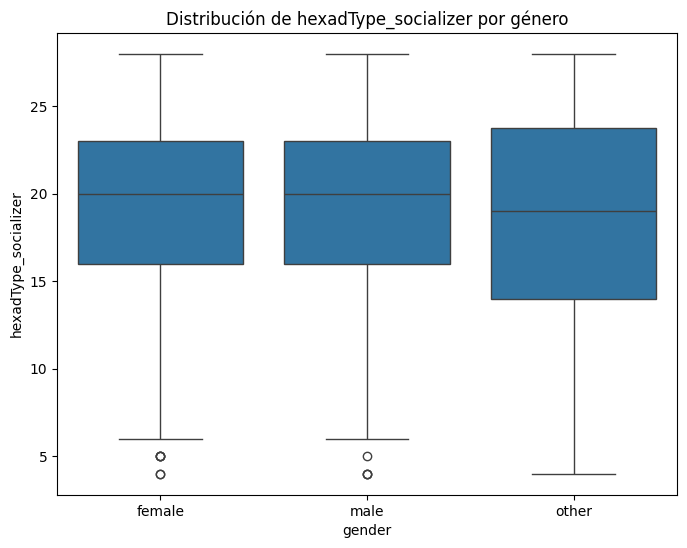

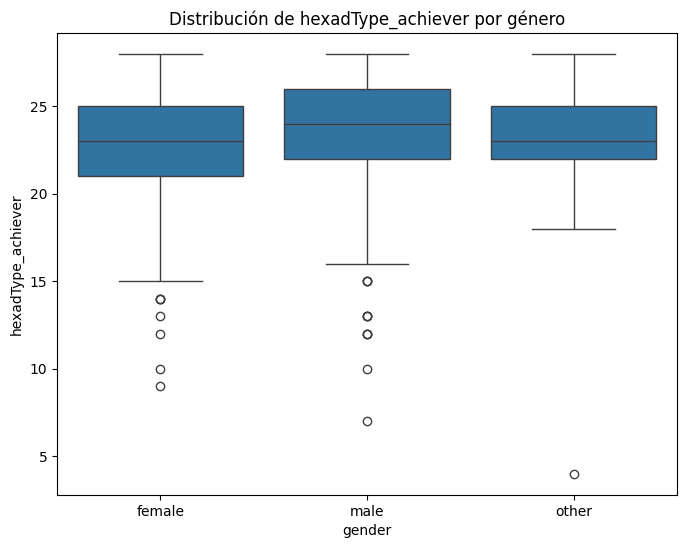

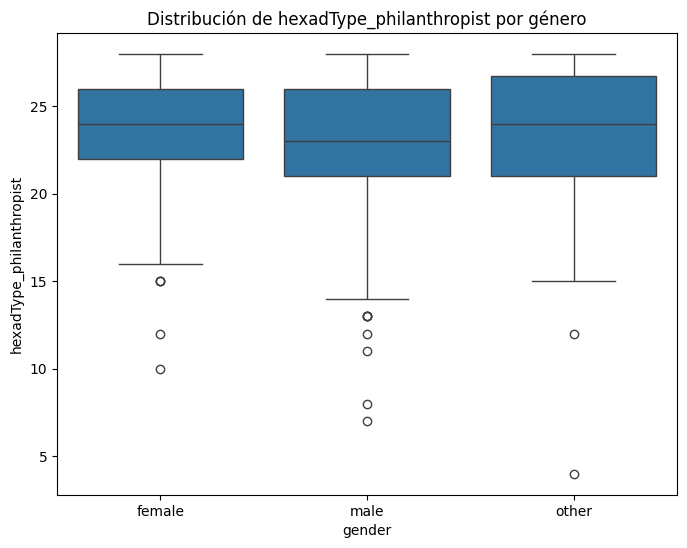

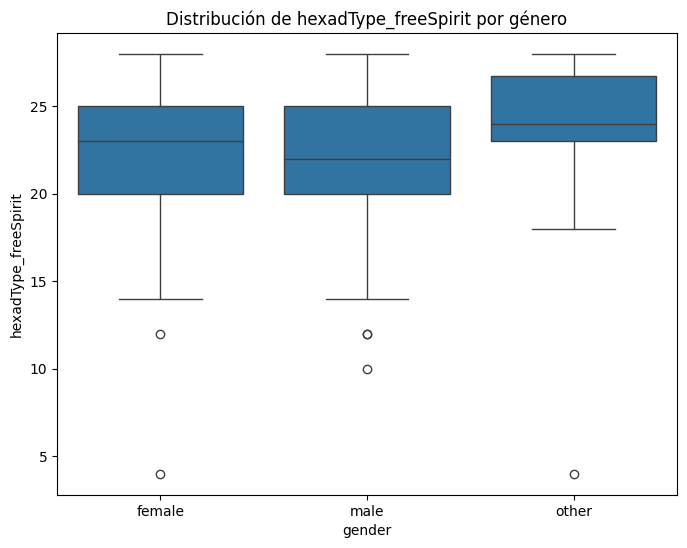

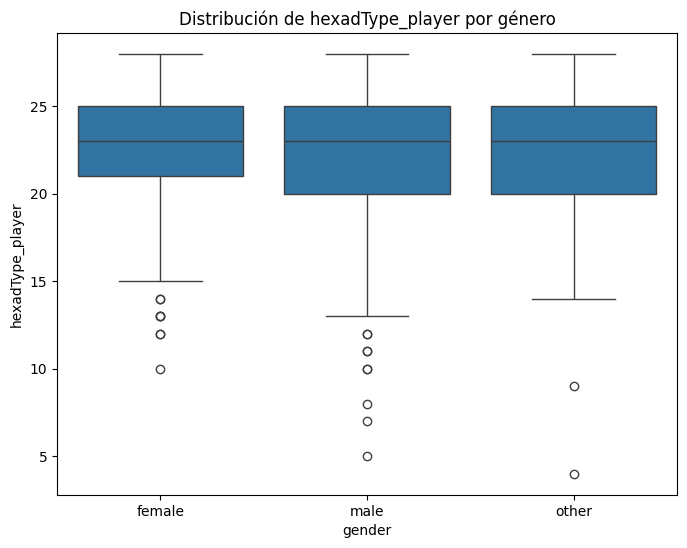

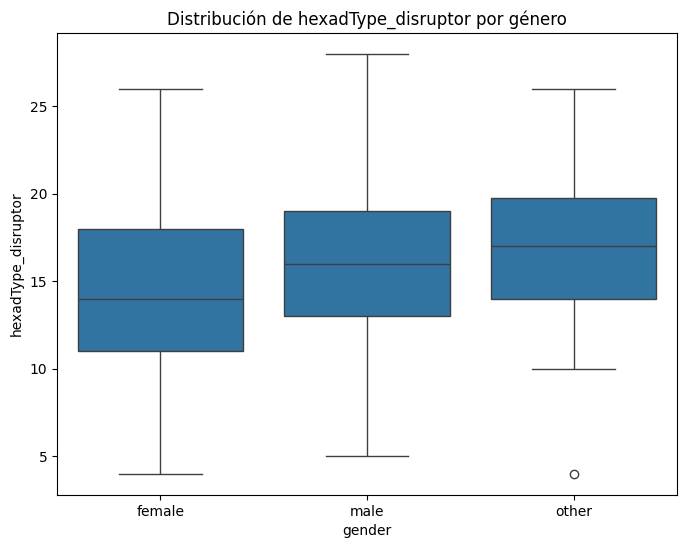

In [ ]:
# Para todos los tipos de Hexad distribuido por genero
for col in ['hexadType_socializer', 'hexadType_achiever', 'hexadType_philanthropist', 'hexadType_freeSpirit', 'hexadType_player', 'hexadType_disruptor']:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=df, x="gender", y=col)
    plt.title(f"Distribución de {col} por género")
    plt.show()

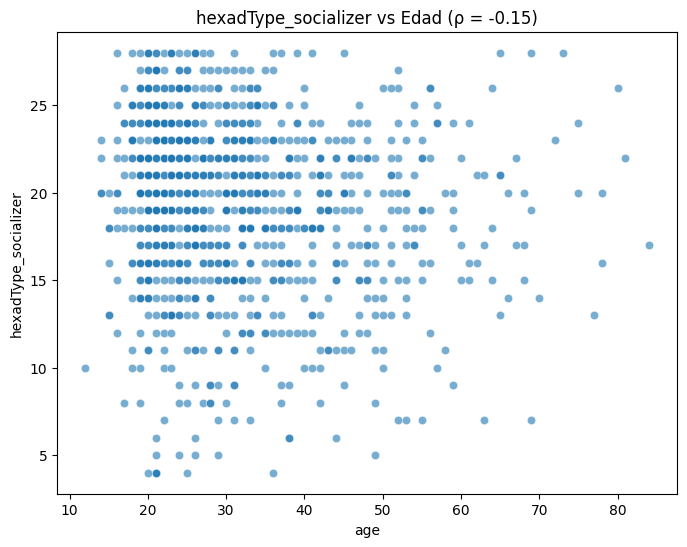

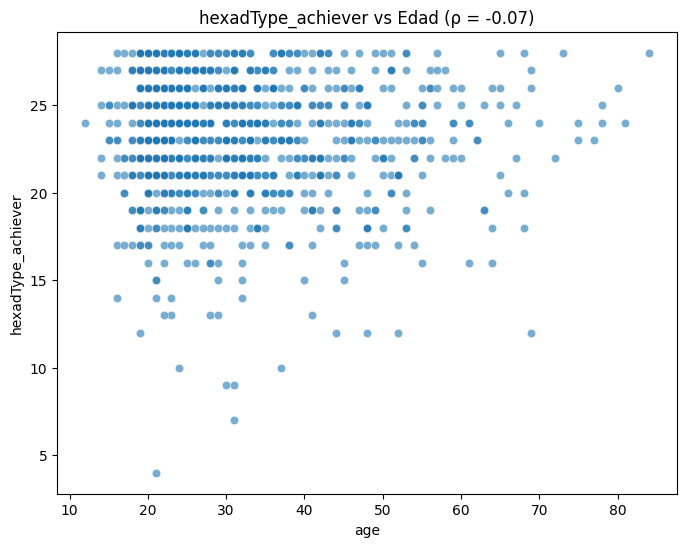

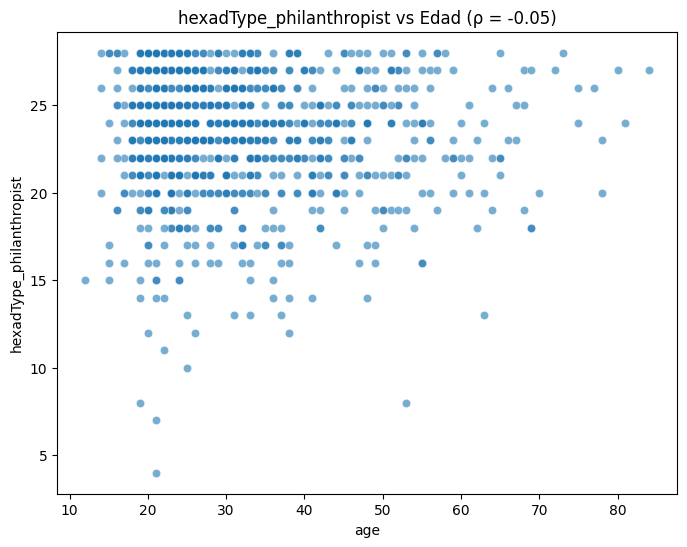

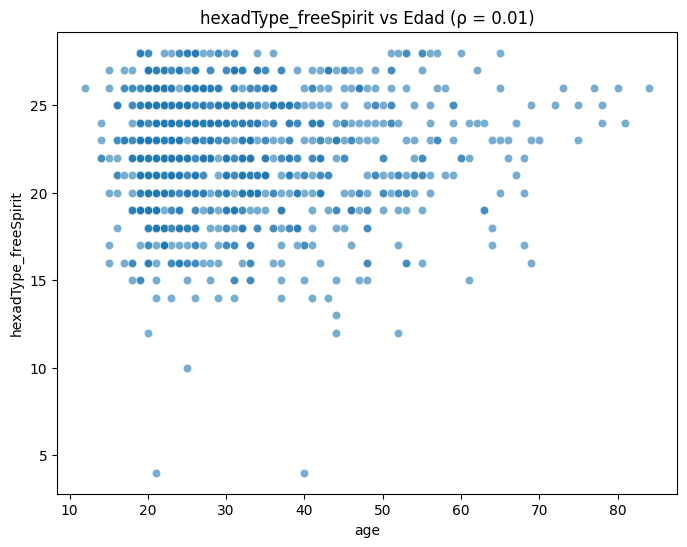

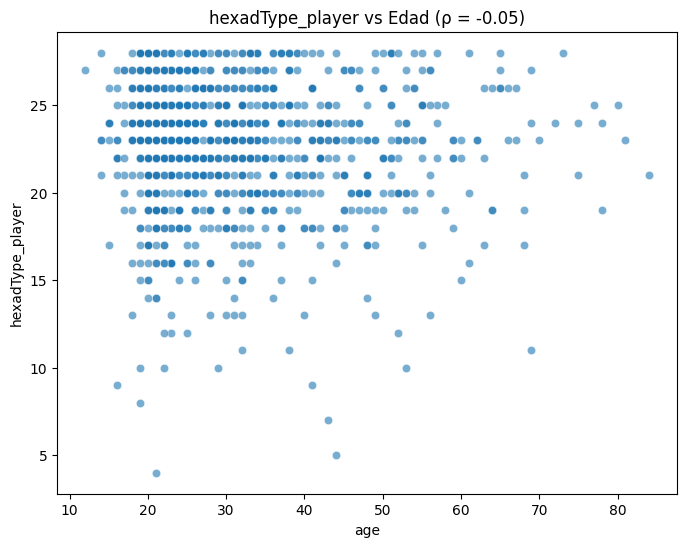

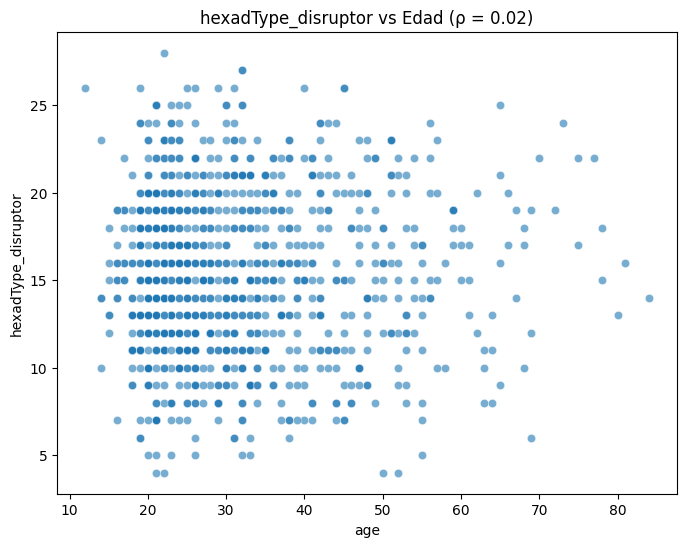

In [ ]:
# Scatterplot + correlación
for col in ['hexadType_socializer', 'hexadType_achiever', 'hexadType_philanthropist', 'hexadType_freeSpirit', 'hexadType_player', 'hexadType_disruptor']:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x="age", y=col, alpha=0.6)
    corr_age = df["age"].corr(df[col], method="spearman")
    plt.title(f"{col} vs Edad (ρ = {corr_age:.2f})")
    plt.show()



In [ ]:
# Lista de columnas Hexad
hexad_cols = [
    'hexadType_socializer', 'hexadType_philanthropist',
    'hexadType_freeSpirit', 'hexadType_achiever',
    'hexadType_player', 'hexadType_disruptor'
]

# Agrupar por región y calcular promedio
region_mean = df.groupby("countryOfOrigin_label")[hexad_cols].mean()

# Crear un diccionario para almacenar cada tipo ordenado
region_sorted_dict = {}

for col in hexad_cols:
    # Ordenar descendente por cada tipo Hexad
    region_sorted_dict[col] = region_mean.sort_values(by=col, ascending=False)[col]

# Mostrar resultados
for col, sorted_series in region_sorted_dict.items():
    print(f"\n=== {col} ordenado por región (descendente) ===")
    print(sorted_series)


=== hexadType_socializer ordenado por región (descendente) ===
countryOfOrigin_label
Romania                                                 28.000000
Belgium                                                 25.000000
Spain                                                   25.000000
Thailand                                                24.000000
Germany                                                 24.000000
China                                                   24.000000
Russian Federation                                      24.000000
Croatia                                                 23.000000
Philippines                                             22.500000
Viet Nam                                                22.500000
Australia                                               20.044025
Israel                                                  20.000000
Malaysia                                                20.000000
United States of America                                

## **Preguntas iniciales**

1. ¿Cuáles son los tipos de usuario Hexad más frecuentes en la muestra?

2. ¿Cuál es la distribución de puntajes para cada tipo de usuario?

3. ¿Existen diferencias demográficas importantes (edad, género, país) entre los tipos de usuario?

4. ¿Qué relaciones existen entre los tipos de usuario?

---

## **Análisis utilizado para resolver las siguientes preguntas**

* Al usar estadística descriptiva (media, desviación estándar, percentiles) para los puntajes y porcentajes, se identifican los tipos más y menos comunes. Por ejemplo, la media más alta para Philanthropist indica que es el tipo más frecuente.

* La distribución se visualiza con histogramas, mostrando la concentración de puntajes para cada tipo. En Achiever se observa una clara tendencia hacia valores altos, reflejando que los usuarios tienden a tener una fuerte orientación al logro.

* Agrupando y comparando puntajes por género, edad o país, se pueden detectar diferencias significativas o patrones demográficos. Por ejemplo, podrían identificarse grupos de mayor predominancia de Socializers o Free Spirits por región geográfica.

* Calculando correlaciones entre puntajes de tipos, se puede estudiar si perfiles tienden a coexistir o si uno excluye al otro, orientando estrategias de gamificación personalizada.

---

## **Posibles futuros análisis**

* Gracias al análisis de distribución utilizando estadística descriptiva podemos adecuar el material dependiendo de la región y así obtener una respuesta más acertada de parte de los usuarios. Ya que este material se adaptaría según los datos del país.

* Posible creación de modelos predictivos de las variables con alta correlación (Philanthropist-Socializer) y (Free Spirit-Disruptor) para obtener prediciones de estos datos lineales.

* Una buena idea de análisis sería un análisis con respecto al tiempo para comprender los cambios en motivaciones y comportamientos.

* El estudio cultural y trasnacional para validar la escabilidad y adaptación del cuestionario que viene junto al primer punto sugerido de la adaptabilidad según de la región.

---

## **Conclusiones**

La muestra analizada presenta una proporción balanceada entre géneros, lo que aporta representatividad equitativa en términos demográficos para el estudio. En cuanto a la procedencia geográfica, el Reino Unido concentra el mayor porcentaje de participantes, representando cerca del 45% de los cuestionarios completados, lo que podría reflejar un sesgo regional relevante o una mayor adopción de la escala Hexad-12 en este país.

Respecto a los tipos de usuario evaluados con el cuestionario Hexad-12, los perfiles más predominantes en la muestra son Philanthropist y Socializer, mientras que Disruptor es el tipo menos observado. Esto indica que la mayoría de los individuos se identifican con motivaciones prosociales y orientadas a la interacción social, y que las actitudes disruptivas o rebelde representan una minoría en esta población.

La edad promedio de los participantes es de 31 años, lo cual sugiere que el perfil estudiado corresponde principalmente a adultos jóvenes, lo que puede ser un factor a considerar para la interpretación y aplicación de los resultados en contextos específicos.

Finalmente, el análisis de correlación revela relaciones moderadamente altas entre los tipos Philanthropist y Socializer (r = 0.54), así como entre Free Spirit y Disruptor (r = 0.43), lo que sugiere que estos pares de perfiles tienden a coexistir o compartir ciertas características motivacionales dentro del modelo Hexad. Este hallazgo es útil para entender cómo se pueden agrupar o segmentar los usuarios en función de sus personalidades y preferencias en entornos gamificados.